Plotting the impact on P_L(k,z=0) of the parameters of CWDM.
Meant to work with the public CLASS.

In [1]:
from classy import Class
from matplotlib import pyplot as plt
import numpy as np

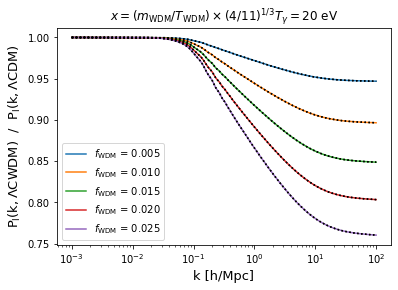

In [3]:
# We need CLASS to compute [P_LCWDM^L/P_LCDM^L] (just for plotting purpose)

# Our fundamental WDM parameters are:
# - f_WDM = omega_WDM/omega_DM 
# - x = (m_WDM/T_WDM)*(4/11)^(1/3)*T_gamma in eV

# When calling CLASS we need to convert these into (m_ncdm, T_ncdm), on top of passing omega_ncdm = omega_WDM
# For the conversion, it should be strictly equivalent to assume:
# 1. Dodelson-Widrow WDM
# 2. Thermal WDM
# 3. The model assumed when building the emulator, 
#    which is almost thermal WDM up to the mass rescaling
#    m_WDM^emulator = m_WDM^thermal * (94.1/93.14)^(1/4) = 1.0026 m_WDM^thermal

# Below we will explicitely prove that 1, 2, 3 are exactly equivalent

kmax = 100
omega_dm = 0.1201075

ref = Class()
ref.set({
    'output':'mPk',
    'P_k_max_h/Mpc':kmax,
    'omega_cdm' : omega_dm
          })
ref.compute()

kk = np.logspace(np.log10(0.001),np.log10(kmax),1000)
h = ref.h()
pk_ref = np.vectorize(ref.pk_lin)(kk*h,0)

# The following plots will have a fixed omega_DM and x and varying f_wdm

x = 20 # in eV
f_list = np.linspace(0.005,0.025,5)

# 1. Assuming Dodelson-Widrow

DW = Class()

for f_wdm in f_list :
    omega_wdm = omega_dm*f_wdm
    m_wdm = x
    Twdm_over_Tgamma = (4./11.)**(1./3.)
    DW.set({
        'output':'mPk',
        'N_ncdm':1,
        'm_ncdm':m_wdm,
        'T_ncdm' : Twdm_over_Tgamma,
        #'YHe' : 0.24,
        'P_k_max_h/Mpc':kmax,
        'omega_cdm' :  omega_dm*(1.-f_wdm),
        'omega_ncdm' : omega_wdm
            })
    DW.compute()
    h=DW.h()
    plt.plot(kk,np.vectorize(DW.pk_lin)(kk*h,0) /pk_ref, label = r'$f_\mathrm{WDM}$'+r' = {a:.3f}'.format(a=f_wdm) )
    
# 2. Assuming thermal WDM

TH = Class()

for f_wdm in f_list :
    omega_wdm = omega_dm*f_wdm
    m_wdm = (omega_wdm*94.1)**0.25 * x**0.75
    Twdm_over_Tgamma = (omega_wdm*94.1)**0.25 * x**-0.25 * (4./11.)**(1./3.)
    TH.set({
        'output':'mPk',
        'N_ncdm':1,
        'm_ncdm':m_wdm,
        'T_ncdm' : Twdm_over_Tgamma,
        #'YHe' : 0.24,
        'P_k_max_h/Mpc':kmax,
        'omega_cdm' :  omega_dm*(1.-f_wdm),
        'omega_ncdm' : omega_wdm
            })
    TH.compute()
    h=TH.h()
    plt.plot(kk,np.vectorize(TH.pk_lin)(kk*h,0) /pk_ref, 'k:')
    
# 3. Assuming same model as emulator

EM = Class()

for f_wdm in f_list :
    omega_wdm = omega_dm*f_wdm
    m_wdm = (omega_wdm*93.14)**0.25 * x**0.75
    Twdm_over_Tgamma = (omega_wdm*93.14)**0.25 * x**-0.25 * (4./11.)**(1./3.)
    EM.set({
        'output':'mPk',
        'N_ncdm':1,
        'm_ncdm':m_wdm,
        'T_ncdm' : Twdm_over_Tgamma,
        #'YHe' : 0.24,
        'P_k_max_h/Mpc':kmax,
        'omega_cdm' :  omega_dm*(1.-f_wdm),
        'omega_ncdm' : omega_wdm
            })
    EM.compute()
    h=EM.h()
    plt.plot(kk,np.vectorize(EM.pk_lin)(kk*h,0) /pk_ref, 'k:')    
    
plt.xscale('log')
plt.yscale('linear')
    
plt.ylabel(r'$\mathrm{P_l(k,\Lambda CWDM) \ \ / \ \ P_l(k,\Lambda CDM)}$', fontsize=13)
plt.xlabel(r'k [h/Mpc]', fontsize=13)
#plt.title(r'$x = \frac{m_\mathrm{WDM}}{T_\mathrm{WDM}} \left(\frac{4}{11}\right)^{1/3} T_\gamma$= {a} eV'.format(a=m))
plt.title(r'$x = (m_\mathrm{WDM}/T_\mathrm{WDM}) \times (4/11)^{1/3} T_\gamma =$'+r'{a} eV'.format(a=x))
plt.legend()
plt.savefig('ratio_of_pklin.png')

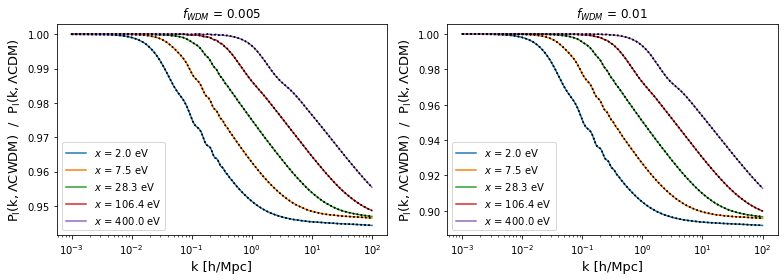

In [4]:
# same as previous cell with two fixed f_WDM and varying x

kmax = 100
omega_dm = 0.1201075

ref = Class()
ref.set({
    'output':'mPk',
    'P_k_max_h/Mpc':kmax,
    'omega_cdm':omega_dm
          })
ref.compute()

kk = np.logspace(np.log10(0.001),np.log10(kmax),1000)
h = ref.h()
pk_ref = np.vectorize(ref.pk_lin)(kk*h,0)

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(11,4))

# The following plots will have a fixed omega_DM, two fixed values of f_wdm and varying x

f_list = [0.005,0.01]
x_list = np.geomspace(2,400,5)

# 1. Assuming Dodelson-Widrow

DW = Class()

for i in range(2) :
    for x in x_list :
        f_wdm = f_list[i]
        omega_wdm = omega_dm*f_wdm
        m_wdm = x
        Twdm_over_Tgamma = (4./11.)**(1./3.)
        DW.set({
            'output':'mPk',
            'N_ncdm':1,
            'm_ncdm':m_wdm,
            'T_ncdm':Twdm_over_Tgamma,
            'YHe' : 0.24,
            'P_k_max_h/Mpc':kmax,
            'omega_cdm' :  omega_dm*(1.-f_wdm),
            'omega_ncdm' : omega_wdm
                  })
        DW.compute()
        h=DW.h()
        ax[i].plot(kk,np.vectorize(DW.pk_lin)(kk*h,0) /pk_ref, label = r'$x$ = {a:1.1f} eV'.format(a=x) )

    ax[i].set_xscale('log')
    ax[i].set_yscale('linear')
    ax[i].set_title(r'$f_{WDM}$ ' + '= {a}'.format(a=f_wdm))

    ax[i].set_ylabel(r'$\mathrm{P_l(k,\Lambda CWDM) \ \ / \ \ P_l(k,\Lambda CDM)}$', fontsize=13)
    ax[i].set_xlabel(r'k [h/Mpc]', fontsize=13)
    ax[i].legend()

# 2. Assuming thermal WDM

TH = Class()    
    
for i in range(2) :
    for x in x_list :
        f_wdm = f_list[i]
        omega_wdm = omega_dm*f_wdm
        m_wdm = (omega_wdm*94.1)**0.25 * x**0.75
        Twdm_over_Tgamma = (omega_wdm*94.1)**0.25 * x**-0.25 * (4./11.)**(1./3.)
        TH.set({
            'output':'mPk',
            'N_ncdm':1,
            'm_ncdm':m_wdm,
            'T_ncdm':Twdm_over_Tgamma,
            'YHe' : 0.24,
            'P_k_max_h/Mpc':kmax,
            'omega_cdm' :  omega_dm*(1.-f_wdm),
            'omega_ncdm' : omega_wdm
                  })
        TH.compute()
        h=DW.h()
        ax[i].plot(kk,np.vectorize(TH.pk_lin)(kk*h,0) /pk_ref, 'k:')
        
# 3. Assuming same model as emulator

EM = Class()

for i in range(2) :
    for x in x_list :
        f_wdm = f_list[i]
        omega_wdm = omega_dm*f_wdm
        m_wdm = (omega_wdm*93.14)**0.25 * x**0.75
        Twdm_over_Tgamma = (omega_wdm*93.14)**0.25 * x**-0.25 * (4./11.)**(1./3.)
        EM.set({
            'output':'mPk',
            'N_ncdm':1,
            'm_ncdm':m_wdm,
            'T_ncdm':Twdm_over_Tgamma,
            'YHe' : 0.24,
            'P_k_max_h/Mpc':kmax,
            'omega_cdm' :  omega_dm*(1.-f_wdm),
            'omega_ncdm' : omega_wdm
                  })
        EM.compute()
        h=EM.h()
        ax[i].plot(kk,np.vectorize(EM.pk_lin)(kk*h,0) /pk_ref, 'k:')

plt.tight_layout()
plt.savefig('ratio_of_pklin_mnu.png')